Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

Loading Data

In [3]:
auto = pd.read_csv("Auto.csv")

print(auto.head())
print()
print(auto.dtypes)
print()
print(auto['name'].value_counts())
print()
print(auto['origin'].value_counts())
print()
print(auto['cylinders'].value_counts())


    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

name
amc matador            5
ford pinto             5
toyota corolla        

Visualization of Non-Linear Trends for Displacement, Horsepower, Weight, and Acceleration

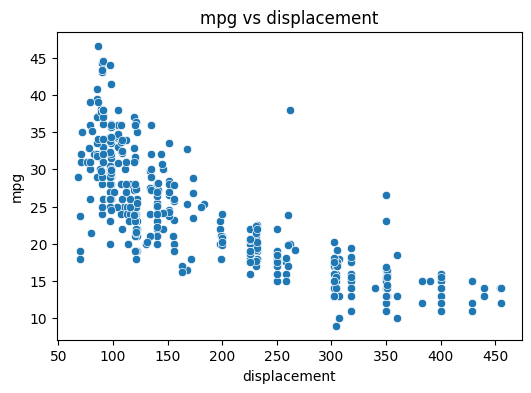

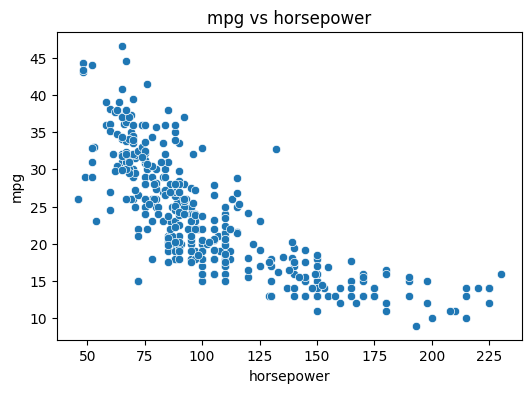

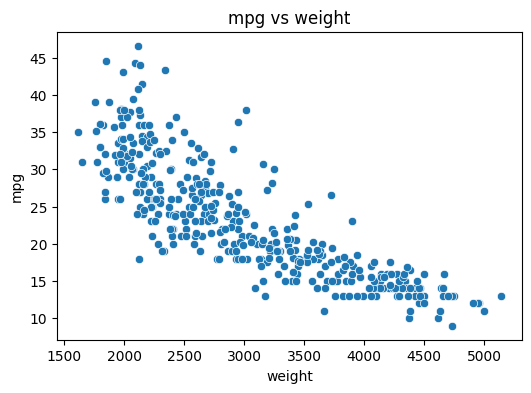

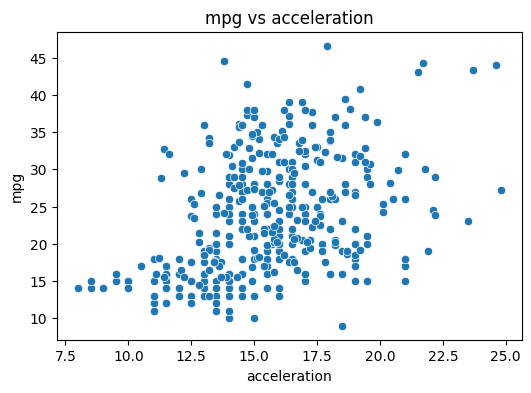

In [4]:
variables = ['displacement', 'horsepower', 'weight', 'acceleration']

for var in variables:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=auto[var], y=auto['mpg'])
    plt.title(f'mpg vs {var}')
    plt.xlabel(var)
    plt.ylabel('mpg')
    plt.show()




Fitting a 2nd, 3rd, and 4th degree polynomial model for MPG

In [5]:
X = auto[['displacement', 'horsepower', 'weight', 'acceleration']]
y = auto['mpg']

# Looping of polynomial degrees 2-4
for degree in [2, 3, 4]:
    print(f"\n{'='*40}")
    print(f"Polynomial Degree: {degree}")
    print(f"{'='*40}")

    poly = PolynomialFeatures(degree=degree, include_bias=False, interaction_only=False)
    X_poly_all = poly.fit_transform(X)
    feature_names_all = poly.get_feature_names_out(X.columns)

    keep_indices = [i for i, name in enumerate(feature_names_all) if " " not in name]
    X_poly = X_poly_all[:, keep_indices]
    feature_names = feature_names_all[keep_indices]

    X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
    X_poly_df = sm.add_constant(X_poly_df)

    model = sm.OLS(y, X_poly_df).fit()

    y_pred = model.predict(X_poly_df)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print(f"R² score: {model.rsquared:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"AIC: {model.aic:.2f}")
    print(f"F-statistic: {model.fvalue:.2f} (p = {model.f_pvalue:.4g})")

    equation = f"mpg = {model.params[0]:.3f}"
    for name, coef in zip(feature_names, model.params[1:]):
        equation += f" + ({coef:.3f} * {name})"
    print("\nEquation (no interaction terms):")
    print(equation)






Polynomial Degree: 2
R² score: 0.7601
RMSE: 3.8184
AIC: 2180.87
F-statistic: 151.65 (p = 1.044e-113)

Equation (no interaction terms):
mpg = 76.770 + (-0.047 * displacement) + (-0.264 * horsepower) + (-0.006 * weight) + (-1.665 * acceleration) + (0.000 * displacement^2) + (0.001 * horsepower^2) + (0.000 * weight^2) + (0.039 * acceleration^2)

Polynomial Degree: 3
R² score: 0.7646
RMSE: 3.7817
AIC: 2181.30
F-statistic: 102.61 (p = 5.082e-111)

Equation (no interaction terms):
mpg = 55.987 + (0.010 * displacement) + (-0.541 * horsepower) + (-0.014 * weight) + (4.594 * acceleration) + (-0.000 * displacement^2) + (0.003 * horsepower^2) + (0.000 * weight^2) + (-0.331 * acceleration^2) + (0.000 * displacement^3) + (-0.000 * horsepower^3) + (-0.000 * weight^3) + (0.007 * acceleration^3)

Polynomial Degree: 4
R² score: 0.7688
RMSE: 3.7477
AIC: 2176.23
F-statistic: 96.71 (p = 1.795e-111)

Equation (no interaction terms):
mpg = -0.001 + (0.284 * displacement) + (-0.575 * horsepower) + (0.070 * 

C:\Users\jacob\AppData\Local\Temp\ipykernel_55192\233947257.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation = f"mpg = {model.params[0]:.3f}"
C:\Users\jacob\AppData\Local\Temp\ipykernel_55192\233947257.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation = f"mpg = {model.params[0]:.3f}"
C:\Users\jacob\AppData\Local\Temp\ipykernel_55192\233947257.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation = f"

The 2nd degree polynomial tends to fit the data best. 

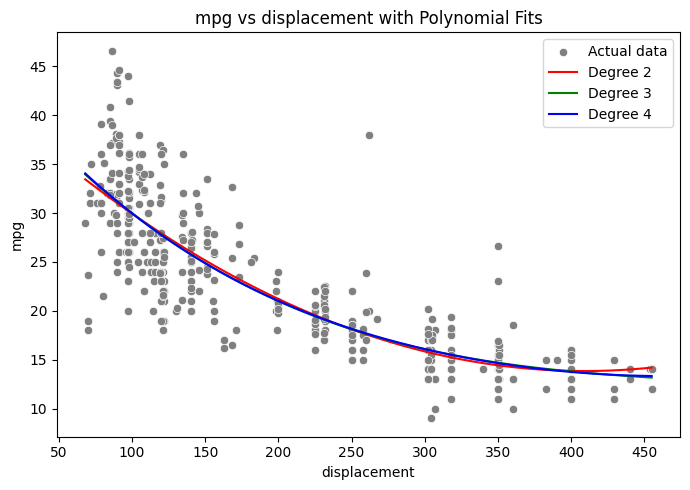

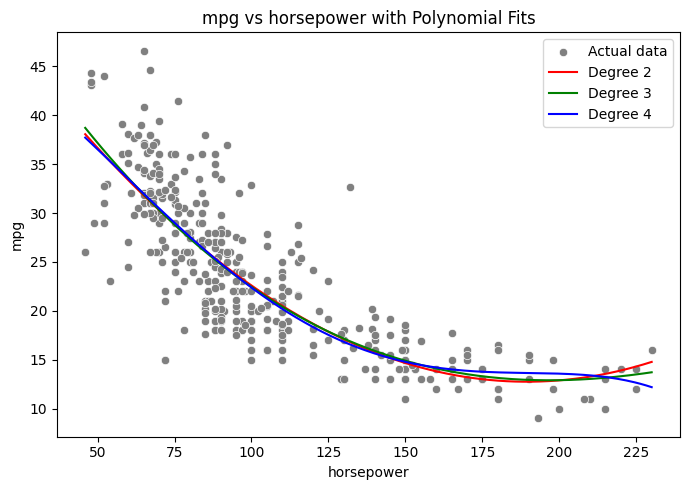

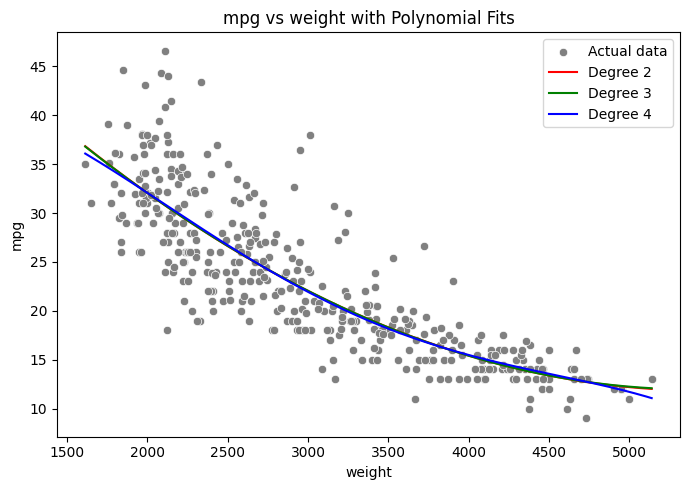

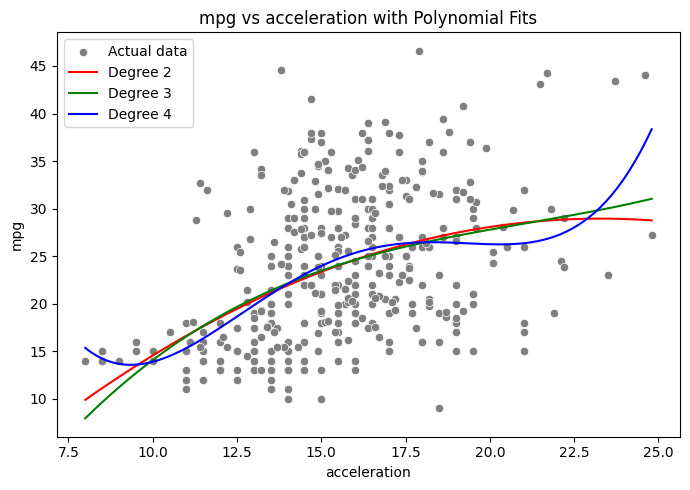

In [6]:
predictors = ['displacement', 'horsepower', 'weight', 'acceleration']
colors = {2: 'red', 3: 'green', 4: 'blue'}

for var in predictors:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=auto[var], y=auto['mpg'], color='gray', label='Actual data')

    for degree in [2, 3, 4]:
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_var = auto[[var]].values
        X_poly = poly.fit_transform(X_var)

        model = LinearRegression()
        model.fit(X_poly, auto['mpg'])

        x_range = np.linspace(X_var.min(), X_var.max(), 200).reshape(-1, 1)
        x_range_poly = poly.transform(x_range)
        y_pred = model.predict(x_range_poly)

        plt.plot(x_range, y_pred, color=colors[degree], label=f'Degree {degree}')

    plt.title(f'mpg vs {var} with Polynomial Fits')
    plt.xlabel(var)
    plt.ylabel('mpg')
    plt.legend()
    plt.tight_layout()
    plt.show()
